In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
import tensorflow as tf
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from IPython.display import SVG
from keras import optimizers
import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
!pip install openpyxl
!pip install xlrd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dictionary = pd.read_excel("/content/drive/My Drive/Data_Dictionary.xlsx")
first_health_camp = pd.read_csv("/content/drive/My Drive/First_Health_Camp_Attended.csv")
health_camp_details = pd.read_csv("/content/drive/My Drive/Health_Camp_Detail.csv")
patient_profile = pd.read_csv("/content/drive/My Drive/Patient_Profile.csv")
second_health_camp = pd.read_csv("/content/drive/My Drive/Second_Health_Camp_Attended.csv")
third_health_camp = pd.read_csv("/content/drive/My Drive/Third_Health_Camp_Attended.csv")
train = pd.read_csv("/content/drive/My Drive/Train1.csv")
test = pd.read_csv("/content/drive/My Drive/test1.csv")

Mounted at /content/drive


In [ ]:
data_dictionary.head()

,Details of the Files
0,Health_Camp_Detail.csv – File containing Healt...
1,Train.csv – File containing registration detai...
2,Patient_Profile.csv – This file contains Patie...
3,First_Health_Camp_Attended.csv – This file con...
4,Second_Health_Camp_Attended.csv - This file co...


In [ ]:
first_health_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [ ]:
patient_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37633 entries, 0 to 37632
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         37633 non-null  int64 
 1   Online_Follower    37633 non-null  int64 
 2   LinkedIn_Shared    37633 non-null  int64 
 3   Twitter_Shared     37633 non-null  int64 
 4   Facebook_Shared    37633 non-null  int64 
 5   Income             37633 non-null  object
 6   Education_Score    37633 non-null  object
 7   Age                37633 non-null  object
 8   First_Interaction  37633 non-null  object
 9   City_Type          14249 non-null  object
 10  Employer_Category  2840 non-null   object
dtypes: int64(5), object(6)
memory usage: 3.2+ MB


In [ ]:
patient_profile.isna().sum()

Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64

In [ ]:
#Calculating the number of numeric columns in patient profile dataset

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_col_patient_profile = patient_profile.select_dtypes(include=numerics)
numeric_col_patient_profile

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared
0,516956,0,0,0,0
1,507733,0,0,0,0
2,508307,0,0,0,0
3,512612,0,0,0,0
4,521075,0,0,0,0
...,...,...,...,...,...
37628,518600,0,0,0,0
37629,509515,0,0,0,0
37630,510713,0,0,0,0
37631,493667,0,0,0,0


In [ ]:
t=(patient_profile.dtypes== 'int64')
num_cols = list(t[t].index)

print("Numerical variables:")
print(num_cols)

Numerical variables:
['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared']


In [ ]:
numeric_col_patient_profile.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared'],
      dtype='object')

In [ ]:
patient_profile.isnull().sum()

Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64

In [ ]:
#Merging these different dataframes into single dataframe for further analysis

In [ ]:
first_health_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [ ]:
merged_details = pd.merge(right=patient_profile, left =first_health_camp, on="Patient_ID")

In [ ]:
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6218 entries, 0 to 6217
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         6218 non-null   int64  
 1   Health_Camp_ID     6218 non-null   int64  
 2   Donation           6218 non-null   int64  
 3   Health_Score       6218 non-null   float64
 4   Unnamed: 4         0 non-null      float64
 5   Online_Follower    6218 non-null   int64  
 6   LinkedIn_Shared    6218 non-null   int64  
 7   Twitter_Shared     6218 non-null   int64  
 8   Facebook_Shared    6218 non-null   int64  
 9   Income             6218 non-null   object 
 10  Education_Score    6218 non-null   object 
 11  Age                6218 non-null   object 
 12  First_Interaction  6218 non-null   object 
 13  City_Type          4451 non-null   object 
 14  Employer_Category  2300 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 777.2+ KB


In [ ]:
merged_details.shape

(6218, 15)

In [ ]:
merged_details.isna().sum()

Patient_ID              0
Health_Camp_ID          0
Donation                0
Health_Score            0
Unnamed: 4           6218
Online_Follower         0
LinkedIn_Shared         0
Twitter_Shared          0
Facebook_Shared         0
Income                  0
Education_Score         0
Age                     0
First_Interaction       0
City_Type            1767
Employer_Category    3918
dtype: int64

In [ ]:
merged_details.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',
       'Unnamed: 4', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [ ]:
merged_details =merged_details.merge(health_camp_details, on="Health_Camp_ID")
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6218 entries, 0 to 6217
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         6218 non-null   int64  
 1   Health_Camp_ID     6218 non-null   int64  
 2   Donation           6218 non-null   int64  
 3   Health_Score       6218 non-null   float64
 4   Unnamed: 4         0 non-null      float64
 5   Online_Follower    6218 non-null   int64  
 6   LinkedIn_Shared    6218 non-null   int64  
 7   Twitter_Shared     6218 non-null   int64  
 8   Facebook_Shared    6218 non-null   int64  
 9   Income             6218 non-null   object 
 10  Education_Score    6218 non-null   object 
 11  Age                6218 non-null   object 
 12  First_Interaction  6218 non-null   object 
 13  City_Type          4451 non-null   object 
 14  Employer_Category  2300 non-null   object 
 15  Camp_Start_Date    6218 non-null   object 
 16  Camp_End_Date      6218 

In [ ]:
third_health_camp.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')

In [ ]:
merged_details =merged_details.merge(second_health_camp, on="Patient_ID")

In [ ]:
merged_details =merged_details.merge(third_health_camp, on="Patient_ID")

In [ ]:
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 5422 non-null   int64  
 1   Health_Camp_ID_x           5422 non-null   int64  
 2   Donation                   5422 non-null   int64  
 3   Health_Score               5422 non-null   float64
 4   Unnamed: 4                 0 non-null      float64
 5   Online_Follower            5422 non-null   int64  
 6   LinkedIn_Shared            5422 non-null   int64  
 7   Twitter_Shared             5422 non-null   int64  
 8   Facebook_Shared            5422 non-null   int64  
 9   Income                     5422 non-null   object 
 10  Education_Score            5422 non-null   object 
 11  Age                        5422 non-null   object 
 12  First_Interaction          5422 non-null   object 
 13  City_Type                  4782 non-null   objec

In [ ]:
merged_details.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,5422.0,507208.149023,12311.461570,485720.000000,496138.000000,507904.000000,518043.000000,528589.0
Health_Camp_ID_x,5422.0,6551.725378,17.691238,6524.000000,6538.000000,6543.000000,6570.000000,6586.0
Donation,5422.0,32.880856,25.985824,10.000000,20.000000,30.000000,40.000000,280.0
Health_Score,5422.0,0.525072,0.281859,0.001667,0.296296,0.549327,0.756793,1.0
Unnamed: 4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_Follower,5422.0,0.175028,0.380026,0.000000,0.000000,0.000000,0.000000,1.0
LinkedIn_Shared,5422.0,0.204168,0.403130,0.000000,0.000000,0.000000,0.000000,1.0
Twitter_Shared,5422.0,0.164515,0.370776,0.000000,0.000000,0.000000,0.000000,1.0
Facebook_Shared,5422.0,0.155293,0.362217,0.000000,0.000000,0.000000,0.000000,1.0
Category3,5422.0,1.991332,0.092708,1.000000,2.000000,2.000000,2.000000,2.0


In [ ]:
merged_details.columns


Index(['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score',
       'Unnamed: 4', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Health_Camp_ID_y', 'Health Score', 'Health_Camp_ID',
       'Number_of_stall_visited', 'Last_Stall_Visited_Number'],
      dtype='object')

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_merged_cols = merged_details.select_dtypes(include=numerics)
numerical_merged_cols.columns

Index(['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score',
       'Unnamed: 4', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Category3', 'Health_Camp_ID_y', 'Health Score',
       'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')

In [ ]:
t=t = (merged_details.dtypes == 'int64') | (merged_details.dtypes == 'float64')
num_cols = list(t[t].index)

print("Numerical variables:")
print(num_cols)

Numerical variables:
['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score', 'Unnamed: 4', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared', 'Category3', 'Health_Camp_ID_y', 'Health Score', 'Health_Camp_ID', 'Number_of_stall_visited', 'Last_Stall_Visited_Number']


In [ ]:
numerical_merged_cols.describe()

,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Unnamed: 4,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Category3,Health_Camp_ID_y,Health Score,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
count,5422.000000,5422.000000,5422.000000,5422.000000,0.0,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,507208.149023,6551.725378,32.880856,0.525072,NaN,0.175028,0.204168,0.164515,0.155293,1.991332,6536.001660,0.607178,6544.733678,3.329768,2.667650
std,12311.461570,17.691238,25.985824,0.281859,NaN,0.380026,0.403130,0.370776,0.362217,0.092708,10.987919,0.266534,22.747020,1.765143,1.580357
min,485720.000000,6524.000000,10.000000,0.001667,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,6523.000000,0.058993,6527.000000,0.000000,0.000000
25%,496138.000000,6538.000000,20.000000,0.296296,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,6529.000000,0.399373,6527.000000,2.000000,1.000000
50%,507904.000000,6543.000000,30.000000,0.549327,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,6534.000000,0.627865,6528.000000,3.000000,2.000000
75%,518043.000000,6570.000000,40.000000,0.756793,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,6549.000000,0.845597,6578.000000,5.000000,4.000000
max,528589.000000,6586.000000,280.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,6555.000000,1.000000,6578.000000,7.000000,6.000000


In [ ]:
merged_details.isna().sum()

Patient_ID                      0
Health_Camp_ID_x                0
Donation                        0
Health_Score                    0
Unnamed: 4                   5422
Online_Follower                 0
LinkedIn_Shared                 0
Twitter_Shared                  0
Facebook_Shared                 0
Income                          0
Education_Score                 0
Age                             0
First_Interaction               0
City_Type                     640
Employer_Category            2042
Camp_Start_Date                 0
Camp_End_Date                   0
Category1                       0
Category2                       0
Category3                       0
Health_Camp_ID_y                0
Health Score                    0
Health_Camp_ID                  0
Number_of_stall_visited         0
Last_Stall_Visited_Number       0
dtype: int64

In [ ]:
#percentage of missing values in each column
missing_percent = merged_details.isna().sum().sort_values(ascending = False)/len(merged_details)
print(missing_percent*100)

Unnamed: 4                   100.000000
Employer_Category             37.661380
City_Type                     11.803762
Patient_ID                     0.000000
Number_of_stall_visited        0.000000
Health_Camp_ID                 0.000000
Health Score                   0.000000
Health_Camp_ID_y               0.000000
Category3                      0.000000
Category2                      0.000000
Category1                      0.000000
Camp_End_Date                  0.000000
Camp_Start_Date                0.000000
First_Interaction              0.000000
Health_Camp_ID_x               0.000000
Age                            0.000000
Education_Score                0.000000
Income                         0.000000
Facebook_Shared                0.000000
Twitter_Shared                 0.000000
LinkedIn_Shared                0.000000
Online_Follower                0.000000
Health_Score                   0.000000
Donation                       0.000000
Last_Stall_Visited_Number      0.000000


In [ ]:
merged_details2 = merged_details.drop('Unnamed: 4', axis =1, inplace = True)

<Axes: >

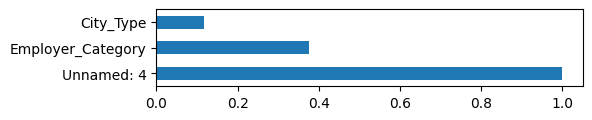

In [ ]:
plt.figure(figsize =(5.5, 1))
missing_percent[missing_percent != 0 ].plot(kind ='barh')

In [ ]:
merged_details.columns

Index(['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score',
       'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Health_Camp_ID_y', 'Health Score', 'Health_Camp_ID',
       'Number_of_stall_visited', 'Last_Stall_Visited_Number'],
      dtype='object')

In [ ]:
#choosing the important columns that may give us meaningful results
imp_cols =['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score','Income', 'Camp_Start_Date', 'Camp_End_Date','Health Score',
       'Number_of_stall_visited']

In [ ]:
merged_details[imp_cols]

,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Income,Camp_Start_Date,Camp_End_Date,Health Score,Number_of_stall_visited
0,494977,6560,20,0.097561,2,16-Aug-03,20-Aug-03,0.673181,5
1,494977,6560,20,0.097561,2,16-Aug-03,20-Aug-03,0.673181,2
2,494977,6560,20,0.097561,2,16-Aug-03,20-Aug-03,0.615827,5
3,494977,6560,20,0.097561,2,16-Aug-03,20-Aug-03,0.615827,2
4,494977,6585,60,0.733990,2,22-Nov-03,05-Dec-03,0.673181,5
...,...,...,...,...,...,...,...,...,...
5417,499996,6524,20,0.537037,None,13-May-05,21-May-05,0.586493,6
5418,495949,6524,30,0.037037,None,13-May-05,21-May-05,0.753930,3
5419,520328,6524,20,0.092593,None,13-May-05,21-May-05,0.552962,6
5420,517824,6524,20,0.648148,None,13-May-05,21-May-05,0.610190,3


In [ ]:
#Since health score has two different columns, will add them.
merged_details['health']= merged_details['Health_Score'] + merged_details['Health Score']
merged_details['health']

0       0.770742
1       0.770742
2       0.713388
3       0.713388
4       1.407171
          ...   
5417    1.123530
5418    0.790967
5419    0.645555
5420    1.258338
5421    1.258338
Name: health, Length: 5422, dtype: float64

In [ ]:
imp_cols_pred= ['Donation', 'health', 'Income','Number_of_stall_visited','Employer_Category','City_Type']

In [ ]:
#Creating a separate dataframe of the columns selected in the imp_cols_pred list.

In [ ]:
useful_details = merged_details[imp_cols_pred]
useful_details.head(5)

,Donation,health,Income,Number_of_stall_visited,Employer_Category,City_Type
0,20,0.770742,2,5,Transport,H
1,20,0.770742,2,2,Transport,H
2,20,0.713388,2,5,Transport,H
3,20,0.713388,2,2,Transport,H
4,60,1.407171,2,5,Transport,H


In [ ]:
useful_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Donation                 5422 non-null   int64  
 1   health                   5422 non-null   float64
 2   Income                   5422 non-null   object 
 3   Number_of_stall_visited  5422 non-null   int64  
 4   Employer_Category        3380 non-null   object 
 5   City_Type                4782 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 296.5+ KB


In [ ]:
t=(useful_details.dtypes=='object')
cat_cols = list(t[t].index)

print("Categorical variables:")
print(cat_cols)

Categorical variables:
['Income', 'Employer_Category', 'City_Type']


In [ ]:
for i in cat_cols:
  useful_details[i].fillna(useful_details[i].mode()[0], inplace =True)

<ipython-input-43-f1f0aeb24442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_details[i].fillna(useful_details[i].mode()[0], inplace =True)
<ipython-input-43-f1f0aeb24442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_details[i].fillna(useful_details[i].mode()[0], inplace =True)
<ipython-input-43-f1f0aeb24442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_details[i].fillna(useful_details[i].mode()[0], inpl

In [ ]:
useful_details.isna().sum()

Donation                   0
health                     0
Income                     0
Number_of_stall_visited    0
Employer_Category          0
City_Type                  0
dtype: int64

In [ ]:
useful_details.head(5)

,Donation,health,Income,Number_of_stall_visited,Employer_Category,City_Type
0,20,0.770742,2,5,Transport,H
1,20,0.770742,2,2,Transport,H
2,20,0.713388,2,5,Transport,H
3,20,0.713388,2,2,Transport,H
4,60,1.407171,2,5,Transport,H


In [ ]:
useful_details.describe()

,Donation,health,Number_of_stall_visited
count,5422.000000,5422.000000,5422.000000
mean,32.880856,1.132249,3.329768
std,25.985824,0.407618,1.765143
min,10.000000,0.077326,0.000000
25%,20.000000,0.844802,2.000000
50%,30.000000,1.147704,3.000000
75%,40.000000,1.432447,5.000000
max,280.000000,1.985676,7.000000


In [ ]:
useful_details.Income.describe()

count     5422
unique       8
top          1
freq      1298
Name: Income, dtype: object

In [ ]:
useful_details.Employer_Category.describe()

count           5422
unique            14
top       Technology
freq            3023
Name: Employer_Category, dtype: object

In [ ]:
useful_details.City_Type.describe()

count     5422
unique       9
top          H
freq      1402
Name: City_Type, dtype: object

In [ ]:
useful_details['City_Type'].value_counts()

H    1402
B     751
D     692
C     622
F     557
E     441
G     385
I     357
A     215
Name: City_Type, dtype: int64

In [ ]:
#Visualization

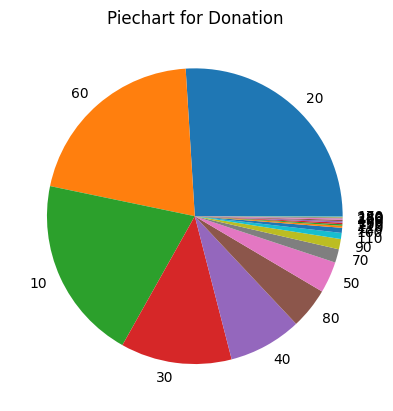

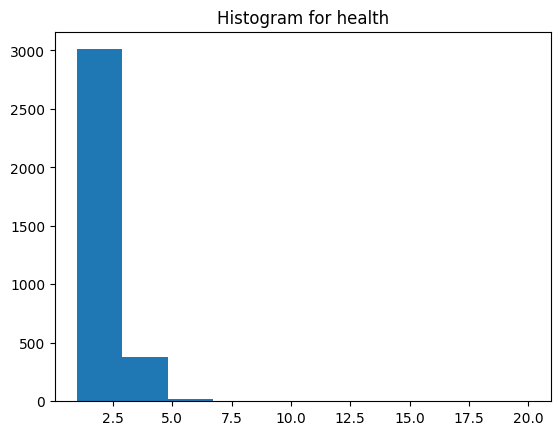

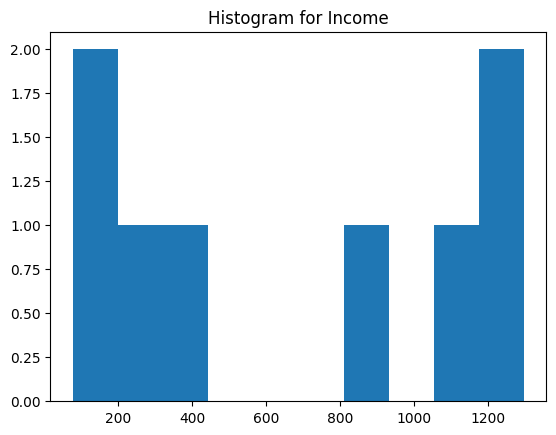

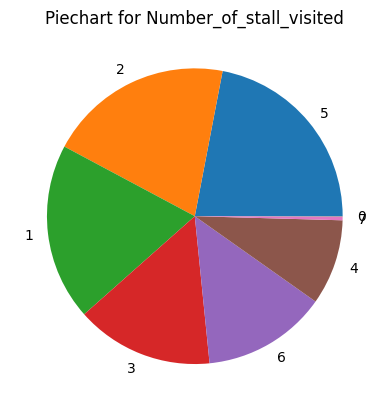

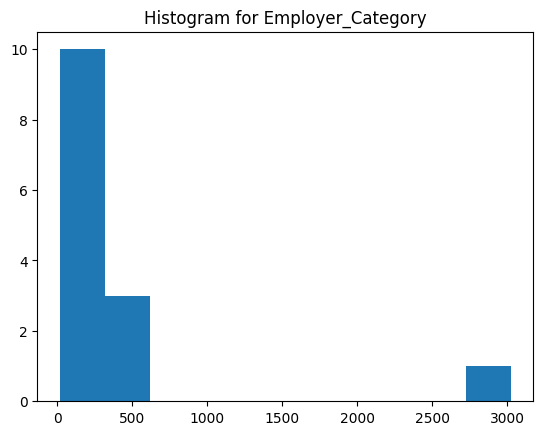

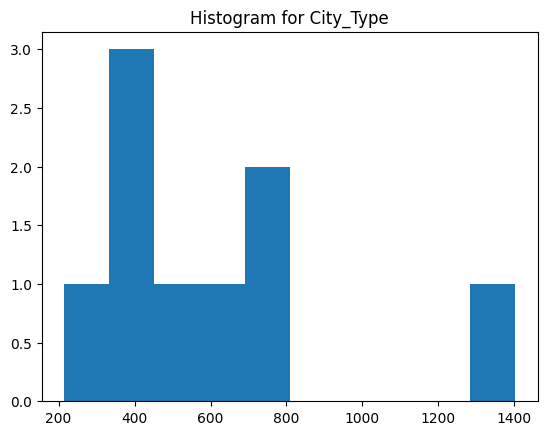

In [ ]:
for col in useful_details.columns:
  if useful_details[col].dtypes =='int64':
    plt.pie(useful_details[col].value_counts(), labels= useful_details[col].unique())
    plt.title('Piechart for {}'.format(col))
    plt.show()
  else:
    plt.hist(useful_details[col].value_counts())
    plt.title('Histogram for {}'.format(col))
    plt.show();

<Figure size 5000x3000 with 0 Axes>

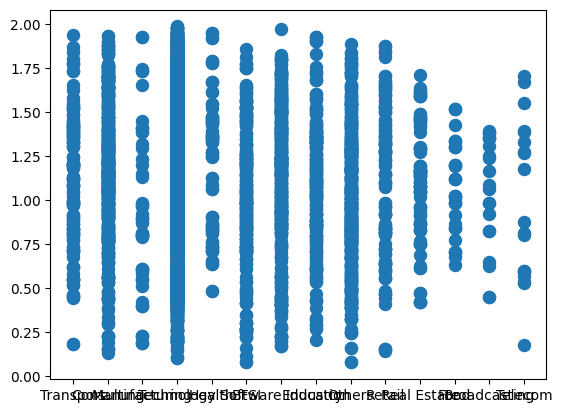

<Figure size 5000x3000 with 0 Axes>

In [ ]:
plt.scatter(x = useful_details['Employer_Category'], y=useful_details['health'], s=75)
plt.figure(figsize = (50,30))

<Figure size 5000x3000 with 0 Axes>

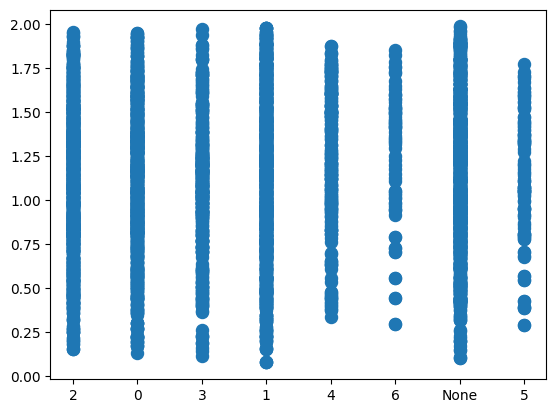

<Figure size 5000x3000 with 0 Axes>

In [ ]:
plt.scatter(x = useful_details['Income'], y=useful_details['health'], s=75)
plt.figure(figsize = (50,30))

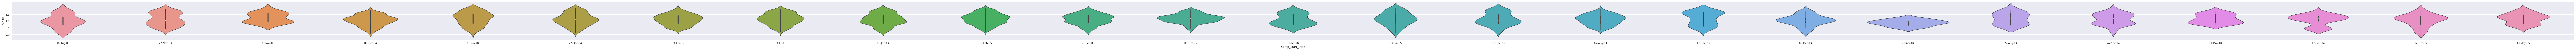

In [ ]:
sns.violinplot(y = merged_details['health'], x = merged_details['Camp_Start_Date'])
#sns.boxplot(y = merged_details['health'], x = merged_details['Camp_Start_Date'])
sns.set(rc={"figure.figsize":(200,3)})


In [ ]:
merged_details.columns

Index(['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score',
       'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Health_Camp_ID_y', 'Health Score', 'Health_Camp_ID',
       'Number_of_stall_visited', 'Last_Stall_Visited_Number', 'health'],
      dtype='object')

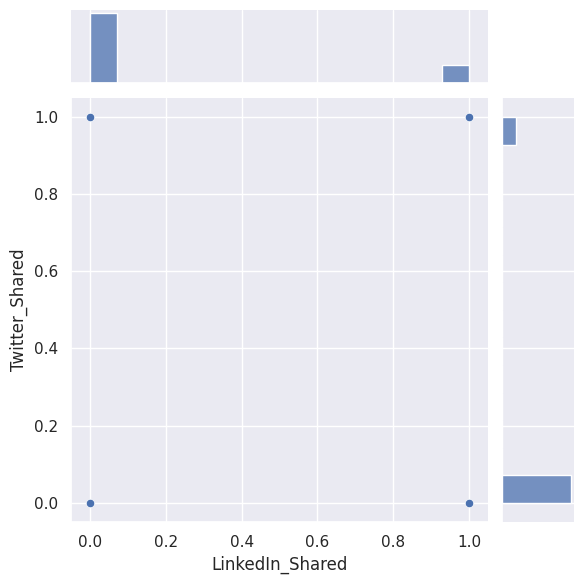

In [ ]:
sns.jointplot(x=merged_details['LinkedIn_Shared'], y =merged_details['Twitter_Shared'],
              data =  merged_details['health'], kind = 'scatter')

In [ ]:
merged_details.head(5)

,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,...,Camp_End_Date,Category1,Category2,Category3,Health_Camp_ID_y,Health Score,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number,health
0,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6536,0.673181,6578,5,3,0.770742
1,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6536,0.673181,6527,2,1,0.770742
2,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6555,0.615827,6578,5,3,0.713388
3,494977,6560,20,0.097561,1,1,1,0,2,68,...,20-Aug-03,First,B,2,6555,0.615827,6527,2,1,0.713388
4,494977,6585,60,0.733990,1,1,1,0,2,68,...,05-Dec-03,First,E,2,6536,0.673181,6578,5,3,1.407171


In [ ]:
merged_dum =pd.get_dummies(merged_details, prefix =None, prefix_sep = "_", drop_first = False)
x = merged_dum.iloc[:,:-1]
y= merged_dum.health

In [ ]:
x.shape

(5422, 653)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y , train_size = 0.3, random_state=23)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
models =model.fit(X_train, y_train)

In [ ]:
rsq=model.score(X_train,y_train)
rsq1=model.score(X_test,y_test)

In [ ]:
print(rsq1)

0.9999999999999999
